# Chapter 4 - Training Models

In [35]:
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

### Direct computation

We can perform linear regression directly with scikit-learn. First, create some randomized data:

In [2]:
X = 2*np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.rand(100,1)

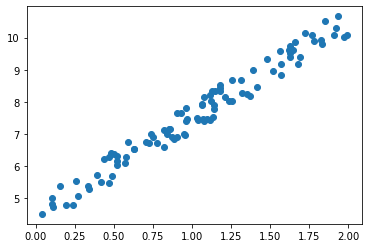

In [3]:
plt.scatter(X, y)
plt.show()

Perform the linear regression:

In [4]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51689283]), array([[3.01438635]]))

We can compute the least squares directly:

In [5]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd, residuals, rank, s

(array([[4.51689283],
        [3.01438635]]),
 array([8.19196948]),
 2,
 array([14.85291652,  3.43056939]))

Alternatively, we can compute the pseudoinverse (Moore-Penrose inverse) directly:

In [6]:
np.linalg.pinv(X_b)

array([[ 4.94055563e-02, -1.91819622e-02,  7.33012520e-03,
         1.40350730e-02,  3.22879217e-02,  2.90868782e-03,
         5.56374306e-03, -1.56861048e-02,  3.03530967e-02,
         9.90133623e-03,  1.26661292e-02,  1.30765075e-02,
         3.43806480e-02,  1.32419737e-02,  8.73142227e-03,
        -9.37161234e-03,  2.11424534e-02,  4.69489672e-02,
        -1.37034777e-02, -1.74499399e-02, -1.36385577e-02,
         4.17135270e-03,  3.19370014e-02, -1.13441861e-02,
         3.74475387e-02,  1.27538931e-02, -1.40420298e-03,
        -1.35894210e-02,  3.11823871e-02,  1.82639415e-02,
        -7.81064103e-03, -5.25592519e-03,  1.75273924e-02,
        -1.49315954e-02,  4.47420517e-02, -1.11389685e-02,
         6.65536693e-03, -3.54423446e-03,  5.35130725e-03,
         4.21096770e-03,  1.67524556e-02,  5.68193046e-03,
         2.17624172e-02,  4.16201410e-03, -2.74781486e-02,
         3.16768209e-02,  4.33495588e-02,  4.70085693e-02,
         4.15092242e-02,  3.55700925e-02, -4.38510602e-0

With that, we get the intercept and slope:

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[4.51689283],
       [3.01438635]])

### Stochastic Gradient Descent (SGD)

In [8]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [9]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.4918783]), array([3.08754933]))

## Polynomial Regression

Get some randomized data based on a quadratic equation:

In [10]:
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5*X**2 + X + 2 + np.random.rand(m, 1)

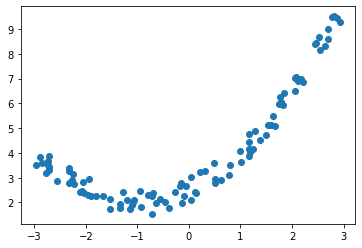

In [11]:
plt.clf()
plt.scatter(X, y)
plt.show()

We add the square of the features as new features:

In [12]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [13]:
X[42]

array([0.49351066])

In [14]:
X_poly[42]

array([0.49351066, 0.24355277])

In [15]:
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly, y)
lin_reg_poly.intercept_, lin_reg_poly.coef_

(array([2.47895355]), array([[1.00342798, 0.50561858]]))

In [16]:
X_sorted = []
y_pred = []
for currX in X:
    X_sorted.append(currX[0])
X_sorted.sort()
X_sorted_conv = []
for currX in X_sorted:
    tmp = lin_reg_poly.intercept_[0] + lin_reg_poly.coef_[0][0]*currX + lin_reg_poly.coef_[0][1]*currX**2
    X_sorted_conv.append(np.array(currX))
    y_pred.append(np.array(tmp))
X_sorted_conv = np.array(X_sorted_conv)
X_sorted_conv = X_sorted_conv.reshape((len(X_sorted_conv),1))
y_pred = np.array(y_pred)
y_pred = y_pred.reshape((len(y_pred),1))

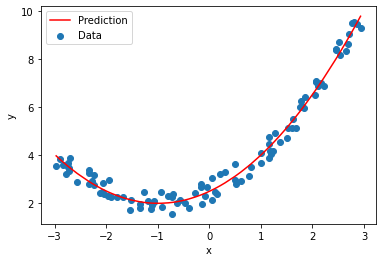

In [17]:
plt.clf()
plt.scatter(X, y, label='Data')
plt.plot(X_sorted_conv, y_pred, color='red', label='Prediction')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Learning Curves

In [18]:
def plot_learning_curves(model, X, y, yLim):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='val')
    plt.xlabel('Training size')
    plt.ylabel('RMSE')
    plt.ylim(0, yLim)
    plt.legend()

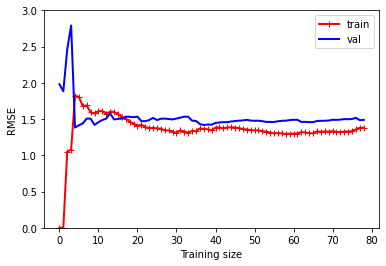

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, 3)

Example of a model which overfits drastically due to the high degree of the polynomial that is used:

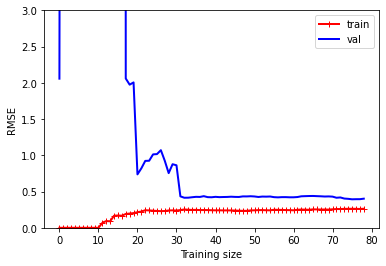

In [20]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y, 3)

## Ridge Regression

In ridge regression, we add the square of the weights to the cost function such that they get minimized as well. Technically, we use half of the l2 norm of the weight vector (without the bias term).

Direct computation:

In [22]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.50175522]])

Alternatively, via stochastic gradient descent:

In [24]:
sgd_red = SGDRegressor(penalty='l2')
sgd_red.fit(X, y.ravel())
sgd_red.predict([[1.5]])

array([5.47737034])

## Least Absolute Shrinkage and Selection Operator (Lasso) regression regression

In lasso regression, we add the absolutes of the weights to the cost function such that they get minimized as well. Technically, we use the l1 norm of the weight vector (without the bias term).

Direct computation:

In [29]:
lasso_reg = Lasso(alpha=1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.01703889])

Alternatively, via stochastic gradient descent:

In [30]:
sgd_red = SGDRegressor(penalty='l1')
sgd_red.fit(X, y.ravel())
sgd_red.predict([[1.5]])

array([5.48053122])

## Elastic Net

In elastic net regression, we add a mixture of l1 and l2 norms of the weight vector to the cost function. The mixture is determined by a mixing hyperparameter, the l1 ratio r. If this ratio r is 0, then only l2 is used; if it is 1, then only l1 is used. If it is between those two values, then the ratio r for l1 is used and the ratio (1-r) for l2.

In [32]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.45924993])

## When to use ridge, lasso and elastic net

Ridge regression is a useful default to use. In case that we suspect that only a few features play an important role, we can use lasso or elastic net since using the l1 norm leads to a quick elimination of weights for features that only minimally contribute to the model. Lasso may behave erratically when the number of features is greater than the number of training instances or when features are strongly correlated; in that case, elastic net is prefered.

## Early Stopping

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

In [47]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
val_errors = []
for epoch in range(2000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [48]:
best_epoch

1565

In [49]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             tol=-inf, warm_start=True)

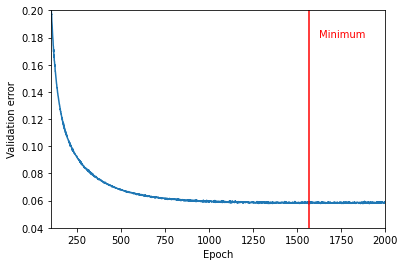

In [71]:
plt.clf()
plt.plot(val_errors)
plt.xlim(100, 2000)
plt.ylim(0.04, 0.2)
plt.xlabel('Epoch')
plt.ylabel('Validation error')
plt.axvline(x=best_epoch, c='red')
plt.text(best_epoch+60, 0.18, 'Minimum', c='red')
plt.show()